In [3]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')

datasets=load_breast_cancer()
X_features=datasets.data
y_label=datasets.target

cancer_df=pd.DataFrame(data=X_features, columns=datasets.feature_names)
cancer_df['target']=y_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
X_train, X_test, y_train ,y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [6]:
start_time=time.time()

ada_pred=ada_clf.predict(X_test)
ada_accuracy=accuracy_score(y_test, ada_pred)

print('ADABOOST 정확도 : {0:.4f}'.format(ada_accuracy))
print('ADABOOST 수행 시간 : {0:.4f}'.format(time.time()-start_time))

ADABOOST 정확도 : 0.9649
ADABOOST 수행 시간 : 0.0401


In [7]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,300,500], 'learning_rate':[0.05,0.1,0.3]}
grid_cv=GridSearchCV(ada_clf, param_grid=params, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
최적 하이퍼 파라미터 : 
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도 : 0.9693


In [8]:
ada_pred=grid_cv.best_estimator_.predict(X_test)
ada_accuracy=accuracy_score(y_test, ada_pred)
print('ADA 정확도 : {0:.4f}'.format(ada_accuracy))

ADA 정확도 : 0.9737


In [9]:
np.random.seed(42)
X=np.random.rand(100, 1)-0.5
y=3*X[:,0]**2+0.05*np.random.randn(100)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
gb_regression_clf=GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1, random_state=42)
gb_regression_clf.fit(X, y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, random_state=42)

In [12]:
gb_regression_clf_slow=GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=42)
gb_regression_clf_slow.fit(X, y)

GradientBoostingRegressor(max_depth=2, random_state=42)

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_predictions(regressors, X, y, axes, label=None, style='r-', data_style='b.', data_label=None):
    x1=np.linspace(axes[0], axes[1], 500)
    y_pred=sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    plt.plot(X[:,0],y,data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='upper center', fontsize=16)
    plt.axis(axes)

Text(0.5, 0, '$x_1$')

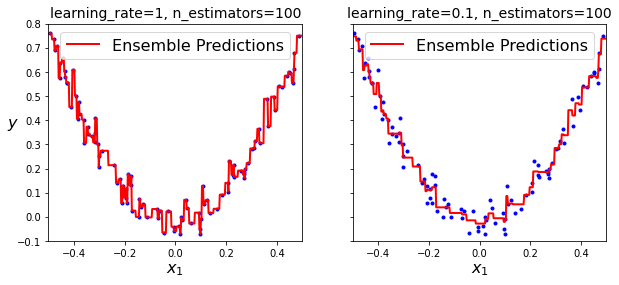

In [14]:
fix, axes=plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gb_regression_clf], X, y, axes=[-0.5,0.5,-0.1,0.8], label='Ensemble Predictions')
plt.title('learning_rate={0}, n_estimators={1}'.format(gb_regression_clf.learning_rate, gb_regression_clf.n_estimators), fontsize=14)

plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gb_regression_clf_slow], X, y, axes=[-0.5,0.5,-0.1,0.8], label='Ensemble Predictions')
plt.title('learning_rate={0}, n_estimators={1}'.format(gb_regression_clf_slow.learning_rate, gb_regression_clf_slow.n_estimators), fontsize=14)
plt.xlabel('$x_1$', fontsize=16)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f} '.format(gb_accuracy))
print('GBM 수행시간 : {0:.4f}'.format(time.time()-start_time))

GBM 정확도 : 0.9561 
GBM 수행시간 : 0.5282


In [16]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,300,500], 'learning_rate':[0.01,0.05,0.1]}

gird_cv=GridSearchCV(gb_clf, param_grid=params, cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
최적 하이퍼 파라미터 : 
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도 : 0.9693


In [17]:
gb_pred-grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9561
